# Importing data and libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
import datetime
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn import preprocessing

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error, r2_score

from xgboost import XGBClassifier
from collections import Counter


In [2]:
australia_weather = pd.read_excel("avustralya_hava.xlsx")

In [3]:
australia_weather.shape

(145460, 15)

In [4]:
australia_weather.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,WNW,56.0,55.0,23.0,1009.2,1005.4,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,W,50.0,49.0,19.0,1009.6,1008.2,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,W,35.0,48.0,19.0,1013.4,1010.1,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NNW,80.0,42.0,9.0,1008.9,1003.6,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,W,28.0,58.0,27.0,1007.0,1005.7,20.1,28.2,Yes,No


In [5]:
new_australia_weather = australia_weather.replace("NA",np.nan)

In [6]:
new_australia_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   WindGustDir    135134 non-null  object        
 6   WindGustSpeed  135197 non-null  float64       
 7   Humidity9am    142806 non-null  float64       
 8   Humidity3pm    140953 non-null  float64       
 9   Pressure9am    130395 non-null  float64       
 10  Pressure3pm    130432 non-null  float64       
 11  Temp9am        143693 non-null  float64       
 12  Temp3pm        141851 non-null  float64       
 13  RainToday      142199 non-null  object        
 14  RainTomorrow   142193 non-null  object        
dtype

In [7]:
# Show rest of NaN values
total = new_australia_weather.isnull().sum().sort_values(ascending=False)
percent_1 = new_australia_weather.isnull().sum()/new_australia_weather.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

,Total,%
Pressure9am,15065,10.4
Pressure3pm,15028,10.3
WindGustDir,10326,7.1
WindGustSpeed,10263,7.1
Humidity3pm,4507,3.1
Temp3pm,3609,2.5
RainTomorrow,3267,2.2
Rainfall,3261,2.2
RainToday,3261,2.2
Humidity9am,2654,1.8


# Data Preprocessing

In [8]:
# drop NaN values from RainToday and RainTomorrow(which is target column)
new_australia_weather.dropna(subset = ["RainToday", "RainTomorrow"], inplace = True)

In [9]:
# Extract Categorical(Object) and Numeric(Float64) values from dataset
categorical_column = [x for x in new_australia_weather.columns if new_australia_weather[x].dtype == "O"]
numeric_column = [x for x in new_australia_weather.columns if new_australia_weather[x].dtype == "float64"]

In [10]:
def show_column_number_range(dataframe, column):
    column_min = np.min(dataframe[column])
    column_max = np.max(dataframe[column])
    print(f"{column} between {column_min} and {column_max}")

In [11]:
for col in new_australia_weather[numeric_column]:
    show_column_number_range(new_australia_weather, col)

MinTemp between -8.5 and 33.9
MaxTemp between -4.8 and 48.1
Rainfall between 0.0 and 371.0
WindGustSpeed between 6.0 and 135.0
Humidity9am between 0.0 and 100.0
Humidity3pm between 0.0 and 100.0
Pressure9am between 980.5 and 1041.0
Pressure3pm between 977.1 and 1039.6
Temp9am between -7.2 and 40.2
Temp3pm between -5.4 and 46.7


In [12]:
# replace nan values with instance(mean - std, mean + std)
def replace_nan_values(dataframe, column):
    data = [dataframe]
    for df_col in data:
        mean = dataframe[column].mean()
        std = dataframe[column].std()
        is_null = df_col[column].isnull().sum()
        # compute random numbers between the mean, std and is_null
        rand_temp = np.random.randint(mean - std, mean + std, size = is_null)
        # fill NaN values in Age column with random values generated
        min_temp = df_col[column].copy()
        min_temp[np.isnan(min_temp)] = rand_temp
        df_col[column] = min_temp
        df_col[column] = dataframe[column].astype(float)

In [13]:
columns_to_change = ["MinTemp", "MaxTemp", "Humidity9am", "Humidity3pm", "Pressure9am", 
                     "Pressure3pm", "Temp9am", "Temp3pm", "Rainfall", "WindGustSpeed"]

for col in new_australia_weather[columns_to_change]:
    replace_nan_values(new_australia_weather, col)

In [14]:
new_australia_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140787 non-null  datetime64[ns]
 1   Location       140787 non-null  object        
 2   MinTemp        140787 non-null  float64       
 3   MaxTemp        140787 non-null  float64       
 4   Rainfall       140787 non-null  float64       
 5   WindGustDir    131624 non-null  object        
 6   WindGustSpeed  140787 non-null  float64       
 7   Humidity9am    140787 non-null  float64       
 8   Humidity3pm    140787 non-null  float64       
 9   Pressure9am    140787 non-null  float64       
 10  Pressure3pm    140787 non-null  float64       
 11  Temp9am        140787 non-null  float64       
 12  Temp3pm        140787 non-null  float64       
 13  RainToday      140787 non-null  object        
 14  RainTomorrow   140787 non-null  object        
dtype

In [15]:
# Calculate temp difference with MinTemp and MaxTemp
new_australia_weather.insert(4, "Temp_difference", new_australia_weather['MaxTemp']- new_australia_weather['MinTemp'])

In [16]:
# Converting object to date_time and extract month
new_australia_weather["Date"] = pd.to_datetime(new_australia_weather["Date"])
new_australia_weather.insert(1, "Month", new_australia_weather["Date"].dt.month)
new_australia_weather.drop(["Date"], axis = 1, inplace=True)

In [17]:
new_australia_weather

,Month,Location,MinTemp,MaxTemp,Temp_difference,Rainfall,WindGustDir,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12,Albury,13.4,22.9,9.5,0.6,W,44.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,12,Albury,7.4,25.1,17.7,0.0,WNW,44.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12,Albury,12.9,25.7,12.8,0.0,WSW,46.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,12,Albury,9.2,28.0,18.8,0.0,NE,24.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,12,Albury,17.5,32.3,14.8,1.0,W,41.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,6,Uluru,3.5,21.8,18.3,0.0,E,31.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,6,Uluru,2.8,23.4,20.6,0.0,E,31.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,6,Uluru,3.6,25.3,21.7,0.0,NNW,22.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,6,Uluru,5.4,26.9,21.5,0.0,N,37.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


# Mapping location by territories

<img src="Australia_Teritories.jpg" width="650" height="650">

In [18]:
# New_South_Wales
new_australia_weather.loc[(new_australia_weather["Location"] == "Albury") |
                          (new_australia_weather["Location"] == "BadgerysCreek") |
                          (new_australia_weather["Location"] == "Canberra") |
                          (new_australia_weather["Location"] == "Cobar") |
                          (new_australia_weather["Location"] == "CoffsHarbour") |
                          (new_australia_weather["Location"] == "Moree") |
                          (new_australia_weather["Location"] == "MountGinini") |
                          (new_australia_weather["Location"] == "Newcastle") |
                          (new_australia_weather["Location"] == "NorahHead") |
                          (new_australia_weather["Location"] == "NorfolkIsland") |
                          (new_australia_weather["Location"] == "Richmond") |
                          (new_australia_weather["Location"] == "Penrith") |
                          (new_australia_weather["Location"] == "Sydney") |
                          (new_australia_weather["Location"] == "SydneyAirport") |
                          (new_australia_weather["Location"] == "WaggaWagga") |
                          (new_australia_weather["Location"] == "Tuggeranong") |
                          (new_australia_weather["Location"] == "Williamtown") |
                          (new_australia_weather["Location"] == "Wollongong"), "Location"] = "New_South_Wales"

In [19]:
# Victoria
new_australia_weather.loc[(new_australia_weather["Location"] == "Ballarat") |
                          (new_australia_weather["Location"] == "Bendigo") |
                          (new_australia_weather["Location"] == "Dartmoor") |
                          (new_australia_weather["Location"] == "Melbourne") |
                          (new_australia_weather["Location"] == "MelbourneAirport") |
                          (new_australia_weather["Location"] == "Mildura") |
                          (new_australia_weather["Location"] == "Nhil") |
                          (new_australia_weather["Location"] == "Portland") |
                          (new_australia_weather["Location"] == "Sale") |
                          (new_australia_weather["Location"] == "Watsonia"), "Location"] = "Victoria"

In [20]:
# Tasmina
new_australia_weather.loc[(new_australia_weather["Location"] == "Hobart") |
                          (new_australia_weather["Location"] == "Launceston"), "Location"] = "Tasmania"

In [21]:
# South_Australia
new_australia_weather.loc[(new_australia_weather["Location"] == "Adelaide") |
                          (new_australia_weather["Location"] == "MountGambier") |
                          (new_australia_weather["Location"] == "Nuriootpa") |
                          (new_australia_weather["Location"] == "Woomera")|
                          (new_australia_weather["Location"] == "Albany"), "Location"] = "South_Australia"

In [22]:
# Northern_Territory
new_australia_weather.loc[(new_australia_weather["Location"] == "AliceSprings") |
                          (new_australia_weather["Location"] == "Darwin") |
                          (new_australia_weather["Location"] == "Katherine") |
                          (new_australia_weather["Location"] == "Uluru"), "Location"] = "Northern_Territory"

In [23]:
# Queensland
new_australia_weather.loc[(new_australia_weather["Location"] == "Brisbane") |
                          (new_australia_weather["Location"] == "Cairns") |
                          (new_australia_weather["Location"] == "GoldCoast") |
                          (new_australia_weather["Location"] == "Townsville"), "Location"] = "Queensland"

In [24]:
# Western_Australia
new_australia_weather.loc[(new_australia_weather["Location"] == "PearceRAAF") |
                          (new_australia_weather["Location"] == "Perth") |
                          (new_australia_weather["Location"] == "PerthAirport") |
                          (new_australia_weather["Location"] == "SalmonGums") |
                          (new_australia_weather["Location"] == "Walpole") |
                          (new_australia_weather["Location"] == "Witchcliffe"), "Location"] = "Western_Australia"

In [25]:
new_australia_weather["Location"].value_counts()

New_South_Wales       52943
Victoria              27829
Western_Australia     17483
South_Australia       15018
Queensland            12047
Northern_Territory     9264
Tasmania               6203
Name: Location, dtype: int64

# Exploratory Data Analysis

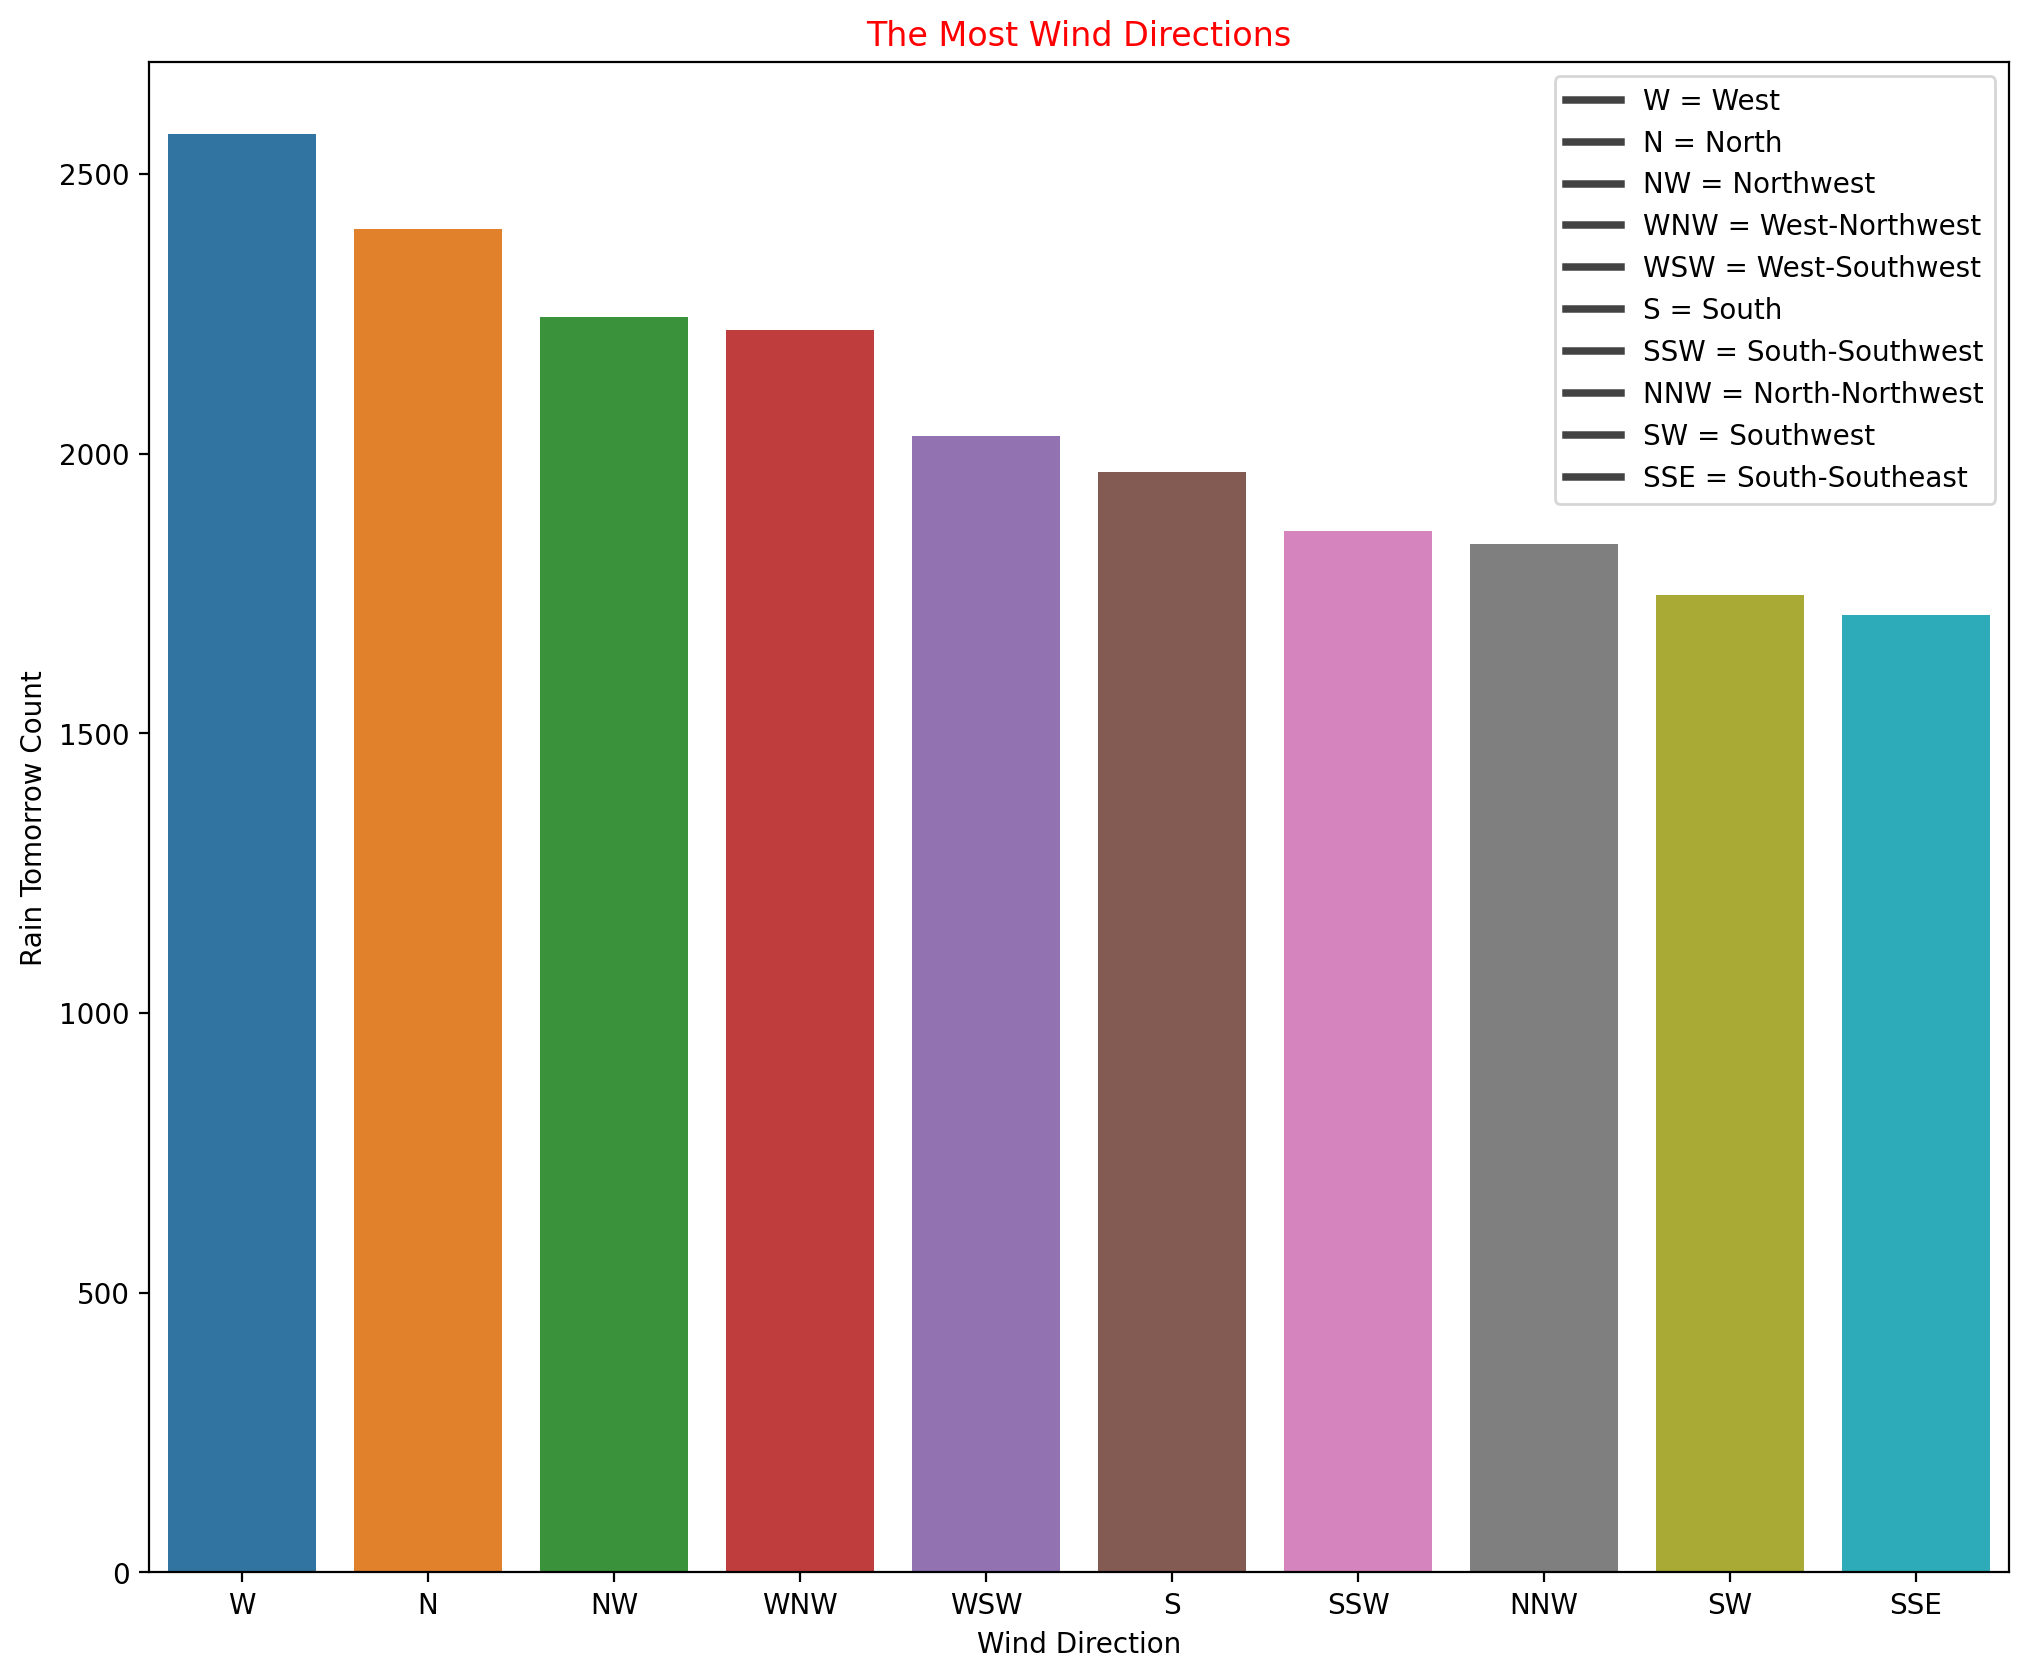

In [26]:
# WindGustDir LARA GORE RainTomorrow ları sırala.

labels = ["W = West", "N = North", "NW = Northwest", "WNW = West-Northwest",
         "WSW = West-Southwest", "S = South", "SSW = South-Southwest", "NNW = North-Northwest",
         "SW = Southwest", "SSE = South-Southeast"]

wind_directions = new_australia_weather.loc[new_australia_weather["RainTomorrow"] == "Yes", :][["WindGustDir", "RainTomorrow"]].value_counts()[:10]
wind_dir =wind_directions.to_frame().reset_index()

plt.figure(figsize=(12,10),dpi=200)
sns.barplot(x = 'WindGustDir', y = 0, data = wind_dir)
plt.xlabel("Wind Direction")
plt.ylabel("Rain Tomorrow Count")
plt.title("The Most Wind Directions", c="red")
plt.legend(labels)

<AxesSubplot:title={'center':'The Regions to Rainy'}, xlabel='Location', ylabel='0'>

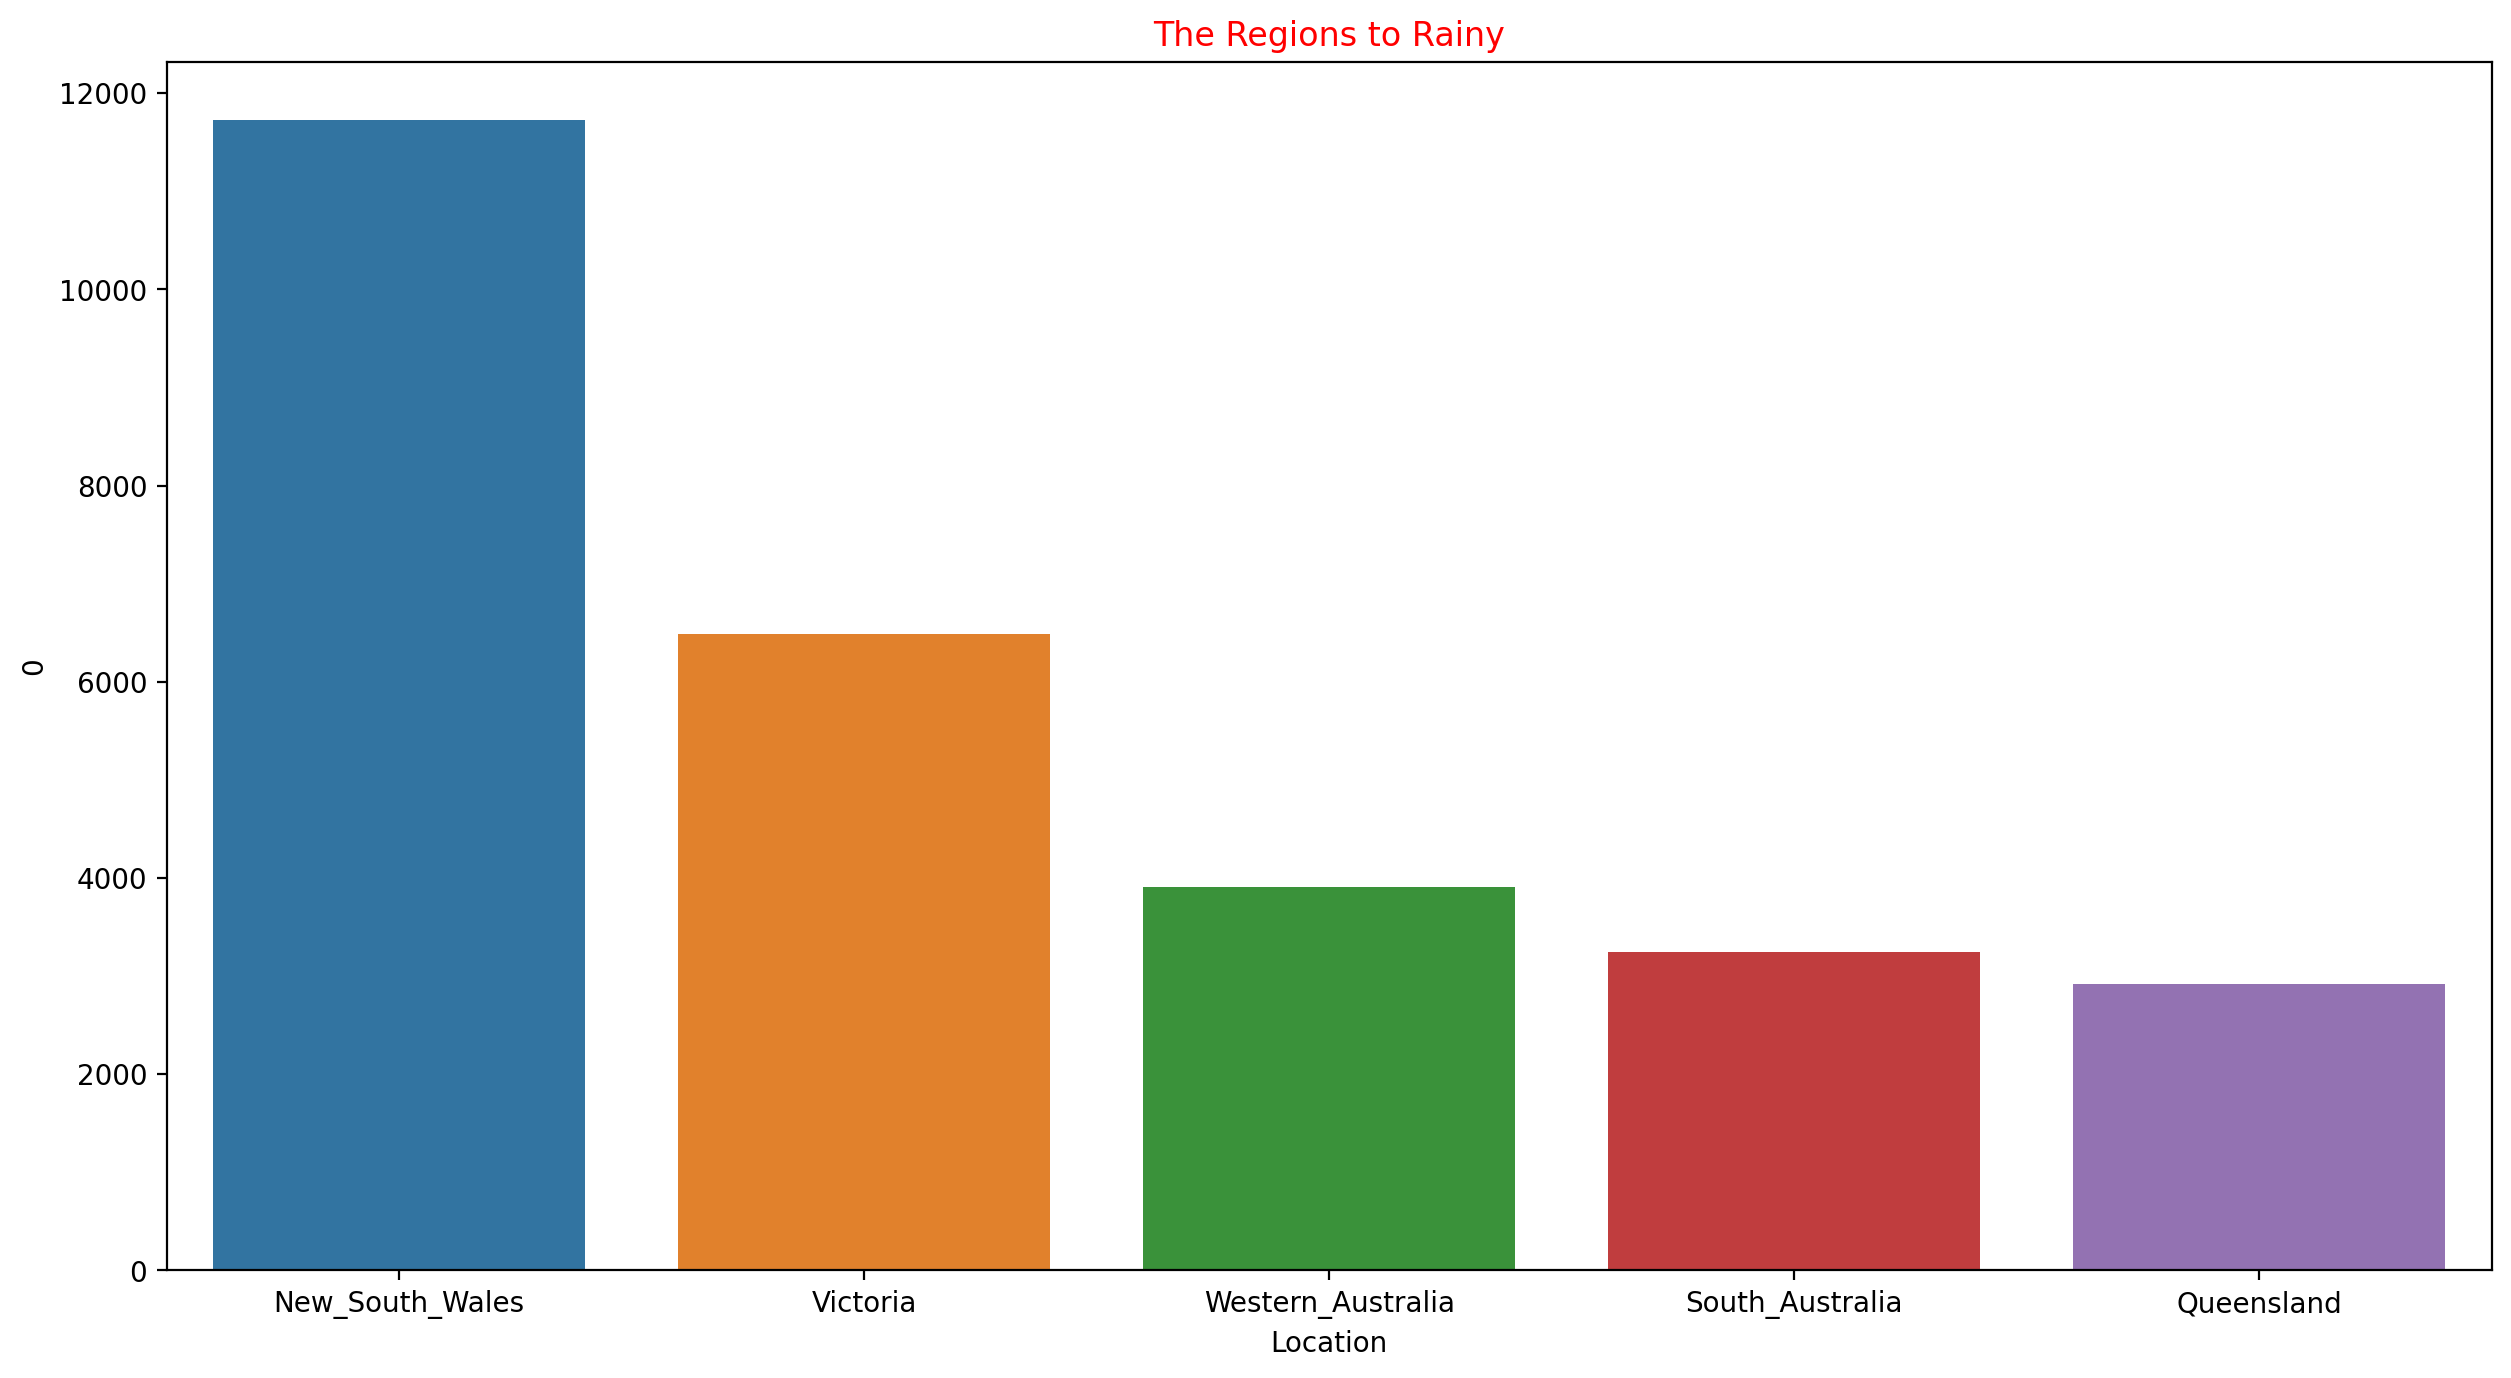

In [27]:
# LOCATION LARA GORE RainTomorrow ları sırala.

import seaborn as sns

location_distribution= new_australia_weather.loc[new_australia_weather["RainTomorrow"] == "Yes", :][["Location", "RainTomorrow"]].value_counts()[:5]
lc =location_distribution.to_frame().reset_index()

plt.figure(figsize=(15,8),dpi=200)
plt.title("The Regions to Rainy", c="red")
sns.barplot(x = 'Location', y = 0, data = lc)

In [28]:
new_australia_weather

,Month,Location,MinTemp,MaxTemp,Temp_difference,Rainfall,WindGustDir,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12,New_South_Wales,13.4,22.9,9.5,0.6,W,44.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No
1,12,New_South_Wales,7.4,25.1,17.7,0.0,WNW,44.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No
2,12,New_South_Wales,12.9,25.7,12.8,0.0,WSW,46.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No
3,12,New_South_Wales,9.2,28.0,18.8,0.0,NE,24.0,45.0,16.0,1017.6,1012.8,18.1,26.5,No,No
4,12,New_South_Wales,17.5,32.3,14.8,1.0,W,41.0,82.0,33.0,1010.8,1006.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,6,Northern_Territory,3.5,21.8,18.3,0.0,E,31.0,59.0,27.0,1024.7,1021.2,9.4,20.9,No,No
145455,6,Northern_Territory,2.8,23.4,20.6,0.0,E,31.0,51.0,24.0,1024.6,1020.3,10.1,22.4,No,No
145456,6,Northern_Territory,3.6,25.3,21.7,0.0,NNW,22.0,56.0,21.0,1023.5,1019.1,10.9,24.5,No,No
145457,6,Northern_Territory,5.4,26.9,21.5,0.0,N,37.0,53.0,24.0,1021.0,1016.8,12.5,26.1,No,No


# Mapping

In [29]:
# WindGustDir fill NaN values with Top 5 most repeated values
import random
windgustdir_list = ["W", "SE", "E", "N", "SSE"]

random.seed(42)
new_australia_weather.loc[new_australia_weather["WindGustDir"].isna(), "WindGustDir"] = random.choice(windgustdir_list)

In [30]:
# Now all columns cleaned from missing values
new_australia_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140787 entries, 0 to 145458
Data columns (total 16 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Month            140787 non-null  int64  
 1   Location         140787 non-null  object 
 2   MinTemp          140787 non-null  float64
 3   MaxTemp          140787 non-null  float64
 4   Temp_difference  140787 non-null  float64
 5   Rainfall         140787 non-null  float64
 6   WindGustDir      140787 non-null  object 
 7   WindGustSpeed    140787 non-null  float64
 8   Humidity9am      140787 non-null  float64
 9   Humidity3pm      140787 non-null  float64
 10  Pressure9am      140787 non-null  float64
 11  Pressure3pm      140787 non-null  float64
 12  Temp9am          140787 non-null  float64
 13  Temp3pm          140787 non-null  float64
 14  RainToday        140787 non-null  object 
 15  RainTomorrow     140787 non-null  object 
dtypes: float64(11), int64(1), object(4)
me

In [31]:
new_australia_weather.isna().sum()

Month              0
Location           0
MinTemp            0
MaxTemp            0
Temp_difference    0
Rainfall           0
WindGustDir        0
WindGustSpeed      0
Humidity9am        0
Humidity3pm        0
Pressure9am        0
Pressure3pm        0
Temp9am            0
Temp3pm            0
RainToday          0
RainTomorrow       0
dtype: int64

In [32]:
# Mapping for Location
regions  = {"Queensland": 7, "Tasmania": 6, "Victoria": 5, "Northern_Territory": 4, "New_South_Wales": 3, "Western_Australia": 2, "South_Australia": 1}

new_australia_weather["Location"] = new_australia_weather['Location'].map(regions)
new_australia_weather["Location"].astype(int)

# Mapping for RainToday
raintoday  = {"Yes": 1, "No": 0}
new_australia_weather["RainToday"] = new_australia_weather['RainToday'].map(raintoday)
new_australia_weather["RainToday"].astype(int)

# Mapping for RainTomorrow
new_australia_weather["RainTomorrow"] = new_australia_weather['RainTomorrow'].map(raintoday)
new_australia_weather["RainTomorrow"].astype(int)
new_australia_weather

,Month,Location,MinTemp,MaxTemp,Temp_difference,Rainfall,WindGustDir,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,12,3,13.4,22.9,9.5,0.6,W,44.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,12,3,7.4,25.1,17.7,0.0,WNW,44.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,12,3,12.9,25.7,12.8,0.0,WSW,46.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,12,3,9.2,28.0,18.8,0.0,NE,24.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,12,3,17.5,32.3,14.8,1.0,W,41.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,6,4,3.5,21.8,18.3,0.0,E,31.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0,0
145455,6,4,2.8,23.4,20.6,0.0,E,31.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,6,4,3.6,25.3,21.7,0.0,NNW,22.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,6,4,5.4,26.9,21.5,0.0,N,37.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0


In [33]:
# Pressure label encoding
new_australia_weather.loc[ new_australia_weather['Pressure3pm'] <= 987.5, 'Pressure3pm'] = 1
new_australia_weather.loc[(new_australia_weather['Pressure3pm'] > 987.5) & (new_australia_weather['Pressure3pm'] <= 997.9), 'Pressure3pm'] = 3
new_australia_weather.loc[(new_australia_weather['Pressure3pm'] > 997.9) & (new_australia_weather['Pressure3pm'] <= 1008), 'Pressure3pm']   = 5
new_australia_weather.loc[(new_australia_weather['Pressure3pm'] > 1008) & (new_australia_weather['Pressure3pm'] <= 1018.7), 'Pressure3pm']   = 6
new_australia_weather.loc[(new_australia_weather['Pressure3pm'] > 1018.7) & (new_australia_weather['Pressure3pm'] <= 1029.5), 'Pressure3pm']   = 4
new_australia_weather.loc[ new_australia_weather['Pressure3pm'] > 1029.5, 'Pressure3pm'] = 2
new_australia_weather['Pressure3pm'] = new_australia_weather['Pressure3pm'].astype(int)

new_australia_weather.loc[ new_australia_weather['Pressure9am'] <= 990.5, 'Pressure9am'] = 1
new_australia_weather.loc[(new_australia_weather['Pressure9am'] > 990.5) & (new_australia_weather['Pressure9am'] <= 1000.5), 'Pressure9am'] = 3
new_australia_weather.loc[(new_australia_weather['Pressure9am'] > 1000.5) & (new_australia_weather['Pressure9am'] <= 1010.5), 'Pressure9am']   = 5
new_australia_weather.loc[(new_australia_weather['Pressure9am'] > 1010.5) & (new_australia_weather['Pressure9am'] <= 1020.5), 'Pressure9am']   = 6
new_australia_weather.loc[(new_australia_weather['Pressure9am'] > 1020.5) & (new_australia_weather['Pressure9am'] <= 1030.5), 'Pressure9am']   = 4
new_australia_weather.loc[ new_australia_weather['Pressure9am'] > 1030.5, 'Pressure9am'] = 2
new_australia_weather['Pressure9am'] = new_australia_weather['Pressure9am'].astype(int)

In [34]:
# Humidity label encoding
new_australia_weather.loc[ new_australia_weather['Humidity9am'] <= 10, 'Humidity9am'] = 1
new_australia_weather.loc[(new_australia_weather['Humidity9am'] > 10) & (new_australia_weather['Humidity9am'] <= 20), 'Humidity9am'] = 2
new_australia_weather.loc[(new_australia_weather['Humidity9am'] > 20) & (new_australia_weather['Humidity9am'] <= 30), 'Humidity9am']   = 3
new_australia_weather.loc[(new_australia_weather['Humidity9am'] > 30) & (new_australia_weather['Humidity9am'] <= 40), 'Humidity9am']   = 4
new_australia_weather.loc[(new_australia_weather['Humidity9am'] > 40) & (new_australia_weather['Humidity9am'] <= 50), 'Humidity9am']   = 5
new_australia_weather.loc[(new_australia_weather['Humidity9am'] > 50) & (new_australia_weather['Humidity9am'] <= 60), 'Humidity9am']   = 6
new_australia_weather.loc[(new_australia_weather['Humidity9am'] > 60) & (new_australia_weather['Humidity9am'] <= 70), 'Humidity9am']   = 7
new_australia_weather.loc[(new_australia_weather['Humidity9am'] > 70) & (new_australia_weather['Humidity9am'] <= 80), 'Humidity9am']   = 8
new_australia_weather.loc[(new_australia_weather['Humidity9am'] > 80) & (new_australia_weather['Humidity9am'] <= 90), 'Humidity9am']   = 9
new_australia_weather.loc[new_australia_weather['Humidity9am'] > 90 , 'Humidity9am']   = 10
new_australia_weather['Humidity9am'] = new_australia_weather['Humidity9am'].astype(int)

new_australia_weather.loc[ new_australia_weather['Humidity3pm'] <= 10, 'Humidity3pm'] = 1
new_australia_weather.loc[(new_australia_weather['Humidity3pm'] > 10) & (new_australia_weather['Humidity3pm'] <= 20), 'Humidity3pm'] = 2
new_australia_weather.loc[(new_australia_weather['Humidity3pm'] > 20) & (new_australia_weather['Humidity3pm'] <= 30), 'Humidity3pm']   = 3
new_australia_weather.loc[(new_australia_weather['Humidity3pm'] > 30) & (new_australia_weather['Humidity3pm'] <= 40), 'Humidity3pm']   = 4
new_australia_weather.loc[(new_australia_weather['Humidity3pm'] > 40) & (new_australia_weather['Humidity3pm'] <= 50), 'Humidity3pm']   = 5
new_australia_weather.loc[(new_australia_weather['Humidity3pm'] > 50) & (new_australia_weather['Humidity3pm'] <= 60), 'Humidity3pm']   = 6
new_australia_weather.loc[(new_australia_weather['Humidity3pm'] > 60) & (new_australia_weather['Humidity3pm'] <= 70), 'Humidity3pm']   = 7
new_australia_weather.loc[(new_australia_weather['Humidity3pm'] > 70) & (new_australia_weather['Humidity3pm'] <= 80), 'Humidity3pm']   = 8
new_australia_weather.loc[(new_australia_weather['Humidity3pm'] > 80) & (new_australia_weather['Humidity3pm'] <= 90), 'Humidity3pm']   = 9
new_australia_weather.loc[new_australia_weather['Humidity3pm'] > 90 , 'Humidity3pm']   = 10
new_australia_weather['Humidity3pm'] = new_australia_weather['Humidity3pm'].astype(int)

In [35]:
# Temp and WindGustDir label encoding
new_australia_weather.loc[ new_australia_weather['MinTemp'] <= -4.3, 'MinTemp'] = 1
new_australia_weather.loc[(new_australia_weather['MinTemp'] > -4.3) & (new_australia_weather['MinTemp'] <= -0.1), 'MinTemp'] = 3
new_australia_weather.loc[(new_australia_weather['MinTemp'] > 0.1) & (new_australia_weather['MinTemp'] <= 4.1), 'MinTemp']   = 5
new_australia_weather.loc[(new_australia_weather['MinTemp'] > 4.1) & (new_australia_weather['MinTemp'] <= 8.3), 'MinTemp']   = 9
new_australia_weather.loc[(new_australia_weather['MinTemp'] > 8.3) & (new_australia_weather['MinTemp'] <= 12.5), 'MinTemp']   = 10
new_australia_weather.loc[(new_australia_weather['MinTemp'] > 12.5) & (new_australia_weather['MinTemp'] <= 16.7), 'MinTemp']   = 8
new_australia_weather.loc[(new_australia_weather['MinTemp'] > 16.7) & (new_australia_weather['MinTemp'] <= 20.9), 'MinTemp']   = 7
new_australia_weather.loc[(new_australia_weather['MinTemp'] > 20.9) & (new_australia_weather['MinTemp'] <= 25.1), 'MinTemp']   = 6
new_australia_weather.loc[(new_australia_weather['MinTemp'] > 25.1) & (new_australia_weather['MinTemp'] <= 29.3), 'MinTemp']   = 4
new_australia_weather.loc[new_australia_weather['MinTemp'] > 29.3 , 'MinTemp']   = 2
new_australia_weather['MinTemp'] = new_australia_weather['MinTemp'].astype(int)

new_australia_weather.loc[ new_australia_weather['MaxTemp'] <= 0.5, 'MaxTemp'] = 1
new_australia_weather.loc[(new_australia_weather['MaxTemp'] > 0.5) & (new_australia_weather['MaxTemp'] <= 5.8), 'MaxTemp'] = 3
new_australia_weather.loc[(new_australia_weather['MaxTemp'] > 5.8) & (new_australia_weather['MaxTemp'] <= 11.1), 'MaxTemp']   = 5
new_australia_weather.loc[(new_australia_weather['MaxTemp'] > 11.1) & (new_australia_weather['MaxTemp'] <= 16.4), 'MaxTemp']   = 9
new_australia_weather.loc[(new_australia_weather['MaxTemp'] > 16.4) & (new_australia_weather['MaxTemp'] <= 21.7), 'MaxTemp']   = 10
new_australia_weather.loc[(new_australia_weather['MaxTemp'] > 21.7) & (new_australia_weather['MaxTemp'] <= 27), 'MaxTemp']   = 8
new_australia_weather.loc[(new_australia_weather['MaxTemp'] > 27) & (new_australia_weather['MaxTemp'] <= 32.3), 'MaxTemp']   = 7
new_australia_weather.loc[(new_australia_weather['MaxTemp'] > 32.3) & (new_australia_weather['MaxTemp'] <= 37.6), 'MaxTemp']   = 6
new_australia_weather.loc[(new_australia_weather['MaxTemp'] > 37.6) & (new_australia_weather['MaxTemp'] <= 42.9), 'MaxTemp']   = 4
new_australia_weather.loc[new_australia_weather['MaxTemp'] > 42.9 , 'MaxTemp']   = 2
new_australia_weather['MaxTemp'] = new_australia_weather['MaxTemp'].astype(int)

new_australia_weather.loc[ new_australia_weather['WindGustSpeed'] <= 18.9, 'WindGustSpeed'] = 5
new_australia_weather.loc[(new_australia_weather['WindGustSpeed'] > 18.9) & (new_australia_weather['WindGustSpeed'] <= 31.8), 'WindGustSpeed'] = 8
new_australia_weather.loc[(new_australia_weather['WindGustSpeed'] > 31.8) & (new_australia_weather['WindGustSpeed'] <= 41.7), 'WindGustSpeed']   = 9
new_australia_weather.loc[(new_australia_weather['WindGustSpeed'] > 41.7) & (new_australia_weather['WindGustSpeed'] <= 57.6), 'WindGustSpeed']   = 10
new_australia_weather.loc[(new_australia_weather['WindGustSpeed'] > 57.6) & (new_australia_weather['WindGustSpeed'] <= 70.5), 'WindGustSpeed']   = 7
new_australia_weather.loc[(new_australia_weather['WindGustSpeed'] > 70.5) & (new_australia_weather['WindGustSpeed'] <= 83.4), 'WindGustSpeed']   = 6
new_australia_weather.loc[(new_australia_weather['WindGustSpeed'] > 83.4) & (new_australia_weather['WindGustSpeed'] <= 96.3), 'WindGustSpeed']   = 4
new_australia_weather.loc[(new_australia_weather['WindGustSpeed'] > 96.3) & (new_australia_weather['WindGustSpeed'] <= 109.2), 'WindGustSpeed']   = 3
new_australia_weather.loc[(new_australia_weather['WindGustSpeed'] > 109.2) & (new_australia_weather['WindGustSpeed'] <= 122.1), 'WindGustSpeed']   = 2
new_australia_weather.loc[new_australia_weather['WindGustSpeed'] > 122.1 , 'WindGustSpeed']   = 1
new_australia_weather['WindGustSpeed'] = new_australia_weather['WindGustSpeed'].astype(int)


In [36]:
# we dont know order of importance of WindGustDir then we do get_dummies
new_australia_weather = pd.get_dummies(new_australia_weather, columns=["WindGustDir"])

In [37]:
new_australia_weather

,Month,Location,MinTemp,MaxTemp,Temp_difference,Rainfall,WindGustSpeed,Humidity9am,Humidity3pm,Pressure9am,...,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW
0,12,3,8,8,9.5,0.6,10,8,3,5,...,0,0,0,0,0,0,0,1,0,0
1,12,3,10,8,17.7,0.0,10,5,3,6,...,0,0,0,0,0,0,0,0,1,0
2,12,3,8,8,12.8,0.0,10,4,3,5,...,0,0,0,0,0,0,0,0,0,1
3,12,3,10,7,18.8,0.0,8,5,2,6,...,0,0,0,0,0,0,0,0,0,0
4,12,3,7,7,14.8,1.0,9,9,4,6,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,6,4,10,8,18.3,0.0,8,6,3,4,...,0,0,0,0,0,0,0,0,0,0
145455,6,4,10,8,20.6,0.0,8,6,3,4,...,0,0,0,0,0,0,0,0,0,0
145456,6,4,10,8,21.7,0.0,8,6,3,4,...,1,0,0,0,0,0,0,0,0,0
145457,6,4,10,8,21.5,0.0,9,6,3,4,...,0,0,0,0,0,0,0,0,0,0


# CLASSIFICATION

In [38]:
X = new_australia_weather.drop(["RainTomorrow"], axis=1)
Y = new_australia_weather["RainTomorrow"]


In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

In [40]:
import joblib # for save model

In [41]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

Y_pred = logreg.predict(x_test)

# save model
joblib.dump(logreg, 'log_reg_model')

acc_log = round(logreg.score(x_train, y_train) * 100, 2)

C:\Users\Tugrul\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train) 
Y_pred = knn.predict(x_test)

# save model
joblib.dump(knn, 'kNN_model')

acc_knn = round(knn.score(x_train, y_train) * 100, 2)

In [43]:
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)  
Y_pred = gaussian.predict(x_test)  

# save model
joblib.dump(gaussian, 'Naive_Bayes_model')

acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

In [109]:
from sklearn.svm import LinearSVC, SVC
linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)

Y_pred = linear_svc.predict(x_test)

# save model
joblib.dump(linear_svc, 'svc_model')

acc_linear_svc = round(linear_svc.score(x_train, y_train) * 100, 2)

C:\Users\Tugrul\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [48]:
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

# save model
joblib.dump(clf, 'xgboost_classifer_model')

accuracy = accuracy_score(y_test, y_pred)

acc_xgb = round(accuracy_score(y_test, y_pred)*100, 2)

In [49]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN','Naive Bayes', 'Linear SVC', 'XgBoost'],
    'Score': [acc_log, acc_knn, acc_gaussian, acc_linear_svc, acc_xgb]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

,Model
Score,
89.43,KNN
84.80,XgBoost
82.93,Linear SVC
82.86,Logistic Regression
77.68,Naive Bayes


In [50]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(10)

,importance
feature,
Humidity3pm,0.340
Pressure3pm,0.061
Rainfall,0.055
WindGustSpeed,0.050
WindGustDir_N,0.034
WindGustDir_NNW,0.034
Location,0.028
Pressure9am,0.027
WindGustDir_NE,0.025


[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

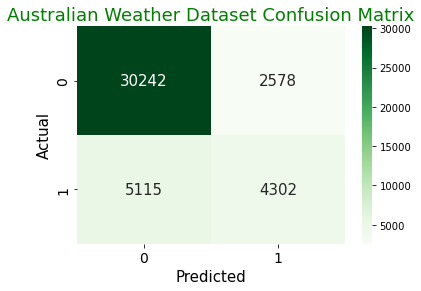

In [51]:
# kNN Confusion Matrix
heat_map_cm = sns.heatmap(confusion_matrix(y_test, knn.predict(x_test)), cmap="Greens", annot = True, annot_kws={"size": 15}, fmt='d')
plt.xlabel("Predicted", fontdict={"fontsize" : 15})
plt.ylabel("Actual", fontdict={"fontsize" : 15})
plt.title("Australian Weather Dataset Confusion Matrix", fontdict={'fontsize':18} , color="green")
heat_map_cm.set_xticklabels(heat_map_cm.get_xmajorticklabels(), fontsize = 14)
heat_map_cm.set_yticklabels(heat_map_cm.get_ymajorticklabels(), fontsize = 14)

# Dealing with Imbalanced Data

## **Method 1 - Oversampling**

<AxesSubplot:>

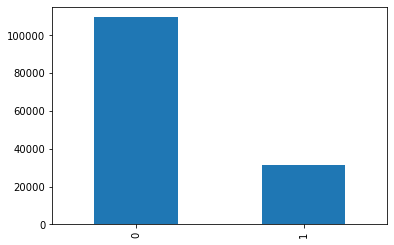

In [52]:
# imbalanced data.We need to balance data
new_australia_weather.RainTomorrow.value_counts().plot.bar()

In [53]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X,Y)

In [58]:
counter_y_resampler = Counter(y_resampled)
counter_y_resampler

Counter({0: 109586, 1: 109586})

In [101]:
counter_y_resampler[1]

109586

**Creating model with oversampling**

In [104]:
knn_ros = KNeighborsClassifier(n_neighbors=3).fit(X_resampled, y_resampled)
logreg_ros = LogisticRegression().fit(X_resampled, y_resampled)
linear_svc_ros = LinearSVC().fit(X_resampled, y_resampled)
nb_ros = GaussianNB().fit(X_resampled, y_resampled)
xgb_ros = XGBClassifier().fit(X_resampled, y_resampled)

**After oversampling**

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

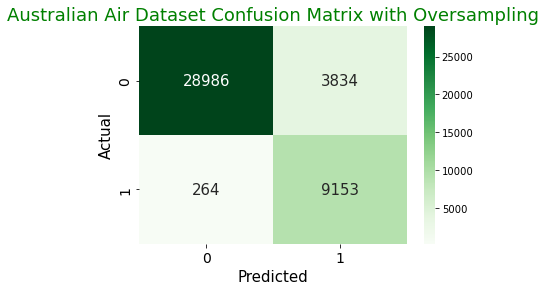

In [60]:
# after oversampling LinarSVC Confusion Matrix
heat_map_cm = sns.heatmap(confusion_matrix(y_test, knn_ros.predict(x_test)), cmap="Greens", annot = True, annot_kws={"size": 15}, fmt='d')
plt.xlabel("Predicted", fontdict={"fontsize" : 15})
plt.ylabel("Actual", fontdict={"fontsize" : 15})
plt.title("Australian Air Dataset Confusion Matrix with Oversampling", fontdict={'fontsize':18} , color="green")
heat_map_cm.set_xticklabels(heat_map_cm.get_xmajorticklabels(), fontsize = 14)
heat_map_cm.set_yticklabels(heat_map_cm.get_ymajorticklabels(), fontsize = 14)

## **SMOTE - Synthetic Minority Oversampling Technique**

In [61]:
from imblearn.over_sampling import SMOTE
X_smoted, y_smoted = SMOTE(random_state=42).fit_resample(X,Y)

In [62]:
Counter(y_smoted)

Counter({0: 109586, 1: 109586})

**Creating model with SMOTE**

In [105]:
knn_smote = KNeighborsClassifier(n_neighbors=3).fit(X_smoted, y_smoted)
logreg_smote = LogisticRegression().fit(X_smoted, y_smoted)
linear_svc_smote = LinearSVC().fit(X_smoted, y_smoted)
nb_smote = GaussianNB().fit(X_smoted, y_smoted)
xgb_smote = XGBClassifier().fit(X_smoted, y_smoted)

**After SMOTE Technique Confusion Matrix**

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

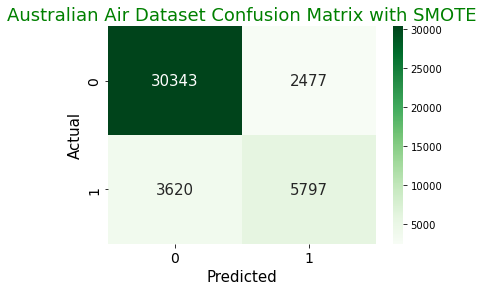

In [66]:
heat_map_cm = sns.heatmap(confusion_matrix(y_test, xgb_smote.predict(x_test)), cmap="Greens", annot = True, annot_kws={"size": 15}, fmt='d')
plt.xlabel("Predicted", fontdict={"fontsize" : 15})
plt.ylabel("Actual", fontdict={"fontsize" : 15})
plt.title("Australian Air Dataset Confusion Matrix with SMOTE", fontdict={'fontsize':18} , color="green")
heat_map_cm.set_xticklabels(heat_map_cm.get_xmajorticklabels(), fontsize = 14)
heat_map_cm.set_yticklabels(heat_map_cm.get_ymajorticklabels(), fontsize = 14)

## **ADASYN - ADAptive SYNthetic oversampling**

In [67]:
from imblearn.over_sampling import ADASYN
X_adasyn, y_adasyn = ADASYN(random_state=42).fit_resample(X,Y)

In [68]:
Counter(y_adasyn)

Counter({0: 109586, 1: 114707})

In [106]:
knn_adasyn = KNeighborsClassifier(n_neighbors=3).fit(X_adasyn, y_adasyn)
logreg_adasyn = LogisticRegression().fit(X_adasyn, y_adasyn)
linear_svc_adasyn = LinearSVC().fit(X_adasyn, y_adasyn)
nb_adasyn = GaussianNB().fit(X_adasyn, y_adasyn)
xgb_adasyn = XGBClassifier().fit(X_adasyn, y_adasyn)

[Text(0, 0.5, '0'), Text(0, 1.5, '1')]

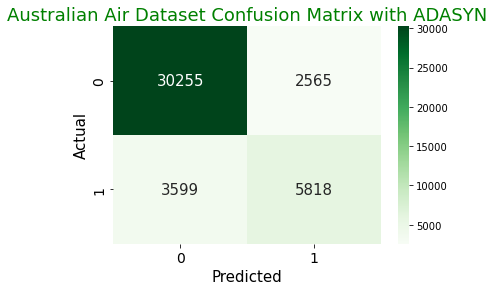

In [70]:
heat_map_cm = sns.heatmap(confusion_matrix(y_test, xgb_adasyn.predict(x_test)), cmap="Greens", annot = True, annot_kws={"size": 15}, fmt='d')
plt.xlabel("Predicted", fontdict={"fontsize" : 15})
plt.ylabel("Actual", fontdict={"fontsize" : 15})
plt.title("Australian Air Dataset Confusion Matrix with ADASYN", fontdict={'fontsize':18} , color="green")
heat_map_cm.set_xticklabels(heat_map_cm.get_xmajorticklabels(), fontsize = 14)
heat_map_cm.set_yticklabels(heat_map_cm.get_ymajorticklabels(), fontsize = 14)

# Method 2 - Undersampling

In [81]:
from imblearn.under_sampling import RandomUnderSampler
X_under, y_under = RandomUnderSampler(random_state=42).fit_resample(X,Y)

In [82]:
Counter(y_under)

Counter({0: 31201, 1: 31201})

In [107]:
knn_rus = KNeighborsClassifier(n_neighbors=3).fit(X_under, y_under)
logreg_rus = LogisticRegression().fit(X_under, y_under)
linear_svc_rus = LinearSVC().fit(X_under, y_under)
nb_rus = GaussianNB().fit(X_under, y_under)
xgb_rus = XGBClassifier().fit(X_under, y_under)

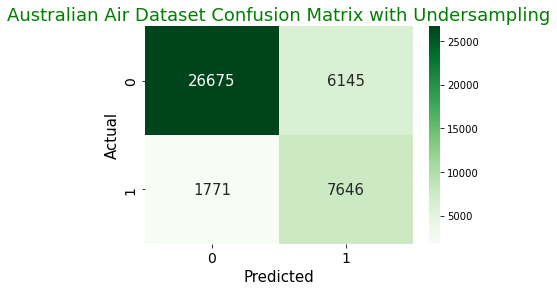

In [88]:
heat_map_cm = sns.heatmap(confusion_matrix(y_test, xgb_rus.predict(x_test)), cmap="Greens", annot = True, annot_kws={"size": 15}, fmt='d')
plt.xlabel("Predicted", fontdict={"fontsize" : 15})
plt.ylabel("Actual", fontdict={"fontsize" : 15})
plt.title("Australian Air Dataset Confusion Matrix with Undersampling", fontdict={'fontsize':18} , color="green")
heat_map_cm.set_xticklabels(heat_map_cm.get_xmajorticklabels(), fontsize = 14)
heat_map_cm.set_yticklabels(heat_map_cm.get_ymajorticklabels(), fontsize = 14)
plt.show()

# Save oversampling and undersampling models

In [108]:
# kNN
joblib.dump(knn_ros, 'knn_ros_model')
joblib.dump(knn_smote, 'knn_smote_model')
joblib.dump(knn_adasyn, 'knn_adasyn_model')
joblib.dump(knn_rus, 'knn_rus_model')

['knn_rus_model']

In [89]:
# Logistic Regression
joblib.dump(logreg_ros, 'logreg_ros_model')
joblib.dump(logreg_smote, 'logreg_smote_model')
joblib.dump(logreg_adasyn, 'logreg_adasyn_model')
joblib.dump(logreg_rus, 'logreg_rus_model')

['logreg_rus_model']

In [90]:
# SVC
joblib.dump(linear_svc_ros, 'linear_svc_ros_model')
joblib.dump(linear_svc_smote, 'linear_svc_smote_model')
joblib.dump(linear_svc_adasyn, 'linear_svc_adasyn_model')
joblib.dump(linear_svc_rus, 'linear_svc_rus_model')

['linear_svc_rus_model']

In [91]:
# Naive Bayes
joblib.dump(nb_ros, 'nb_ros_model')
joblib.dump(nb_smote, 'nb_smote_model')
joblib.dump(nb_adasyn, 'nb_adasyn_model')
joblib.dump(nb_rus, 'nb_rus_model')

['nb_rus_model']

In [92]:
# XgBoostClassifier
joblib.dump(xgb_ros, 'xgb_ros_model')
joblib.dump(xgb_smote, 'xgb_smote_model')
joblib.dump(xgb_adasyn, 'xgb_adasyn_model')
joblib.dump(xgb_rus, 'xgb_rus_model')

['xgb_rus_model']

In [ ]:
# to load model for example
# joblib.load('knn_ros_model')

In [95]:
new_australia_weather.RainTomorrow.value_counts()

0    109586
1     31201
Name: RainTomorrow, dtype: int64

In [96]:
new_australia_weather.to_excel("australia_weather.xlsx")

In [97]:
new_australia_weather.to_csv('australia_weather.csv')